---
title: "Word2Vec"
description: "Post description"
date: "2025-02-09"
date-modified: "2025-02-22"
slug: test
categories: [news]
bread-crumbs: true
back-to-top-navigation: true
toc: true
toc-depth: 3
---


## What is Word2Vec and how does it work?

embeddings

Word2Vec is a family of shallow neural network models with two main architectures:
- Continuous bag of words (CBOW): Learn word embeddings by predicting center word from surrounding context words
- Skip-grams: Learn word embeddings by predicting surrounding context words from center word

Skip-gram typically performs bettre for rare words and smaller datasets


2013 by Google
Tomas Mikolov, Kai Chen, Greg Corrado, and Jeffrey Dean. Efficient estimation of word representations in vector space. [arXiv preprint arXiv:1301.3781](https://arxiv.org/abs/1301.3781), 2013. 


made an important step in moving from simple statistical representations to semantic meaning of words



Goal:
- Transform the entire input dataset into vector representations
- Not only focus on inherent labels of individuals words but on the relationship between those
- generate dense vectors of embeddings
- Goal: load the parameters that maximize that probability of a given word or group of words being an accurate prediction

Through distributional hypothesis: words in similar contexts have similar meanings
Famous example: king - man + woman ≈ queen
Other examples: Paris - France + Italy ≈ Rome, walking - walked + swam ≈ swimming
Captures both syntactic and semantic relationships




Originally used hierarchical softmax or negative sampling to approximete full softmax
Objective function: involves maximizing dot product between related words
### CBOW

Training objective: Maximize probability of center word



### Skipgrams
Training objective: Maximize probability of correct context words


## What limitations does Word2Vec overcome?
- All previous approaches focused on generating sparse vectors that can give an indication that two words are related, but not that there is a semantic relationship between them. (dont fully understand how this is related to the boottom)
"The dog chased the cat" and "The cat chased the dog" would have the same distance in the vector space (distance?)
- Sparse, high-dimensional representations
- Lack of semantic information in tradition word representations
- Need for transferable word representations for downstream tasks


## Word2Vec vs BERT


## Where is Word2Vec used?
- Used as a word-embedding method
- also effective in creating recommendation engines and making sense of sequential data even in commercial, non-language tasks. 

- Resource-constrained environments (mobile, edge devices)
- Applications requiring fixed word representations
- When explainability and stability of representations is crucial
- As features for simple NLP tasks where context is less important
- When training speed is a priority

## What are the limitations of Word2Vec?
- No handling of polysemy (same word, different meanings)
- Out-of-vocabulary words problem
- No incorporation of subword information
- Static embeddings (not contextual)
- No sentence-level understanding



## Implementing Word2Vec from scratch in Python
gensim

1. Define model architecture (CBOW or Skip-gram)
2. Implement negative sampling or hierarchical softmax
3. Define window size and create word pairs
4. Train using stochastic gradient descent
5. Apply techniques like subsampling frequent words
### CBOW


### Skipgrams

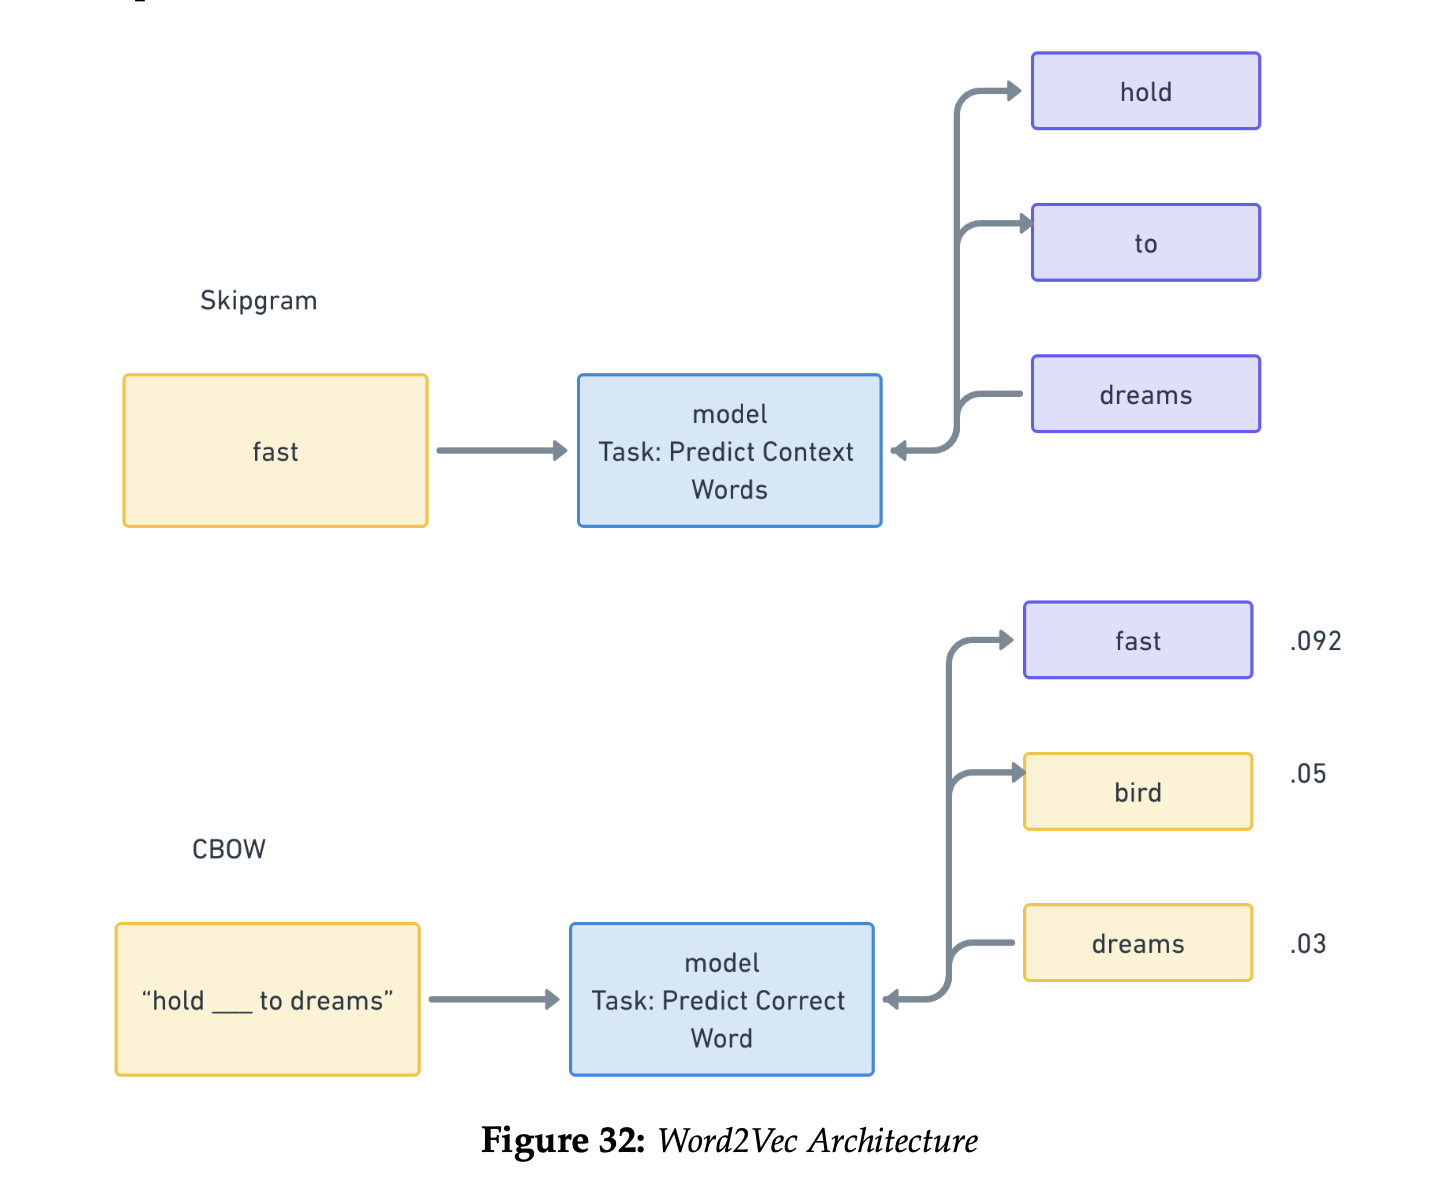
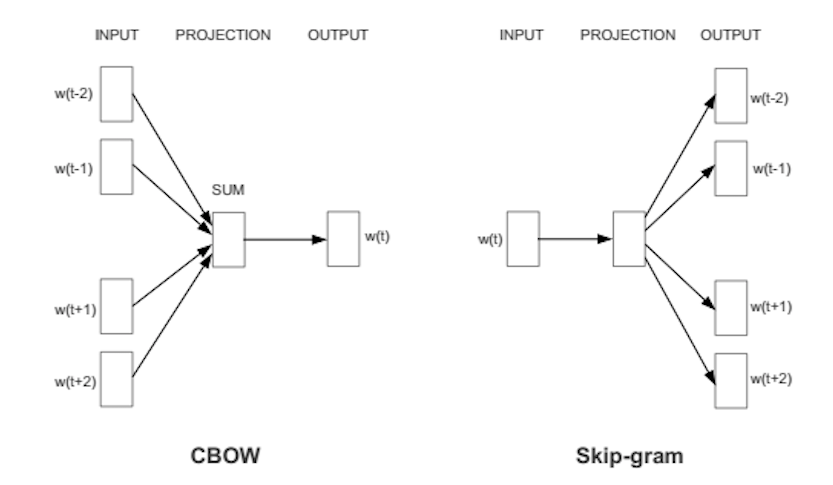

## Implementing Word2Vec from Scratch with PyTorch
To understand the inner workings of Word"Vec, we will implement it with PyTorch.
Let's implement a Skip-gram Word2Vec model from scratch with negative sampling. I'll break this down into clear steps:
PyTorch for neural network operation.

- List of input words
- processed thourhg a second layer (embedding layer), 
- output layer (linear model that returns probabilities.)


Code is based on [this notebook](https://github.com/veekaybee/viberary/blob/main/src/notebooks/cbow.ipynb)

In [ ]:
corpus = [
    "the quick brown fox jumps over the lazy dog",
    "the fox and the hound are friends",
    "quick brown foxes jump over lazy dogs",
    "the dog chased the fox around"
]


### Step 1: Data Preparation
Create an input vocabulary

In [9]:
# First, we'll initialize our hyperparameters for the model:

CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right - this is our context window
EMBEDDING_DIM = 100  # size of the embeddings matrix - we'll get to this in a bit

# Our tiny training dataset

raw_text = """To Kara's astonishment, she discovers that a portal has opened in her bedroom closet and two goblins have fallen through! They refuse to return to the fairy realms and be drafted for an impending war. 
In an attempt to roust the pesky creatures, Kara falls through the portal, 
smack into the middle of a huge war. Kara meets Queen Selinda, who appoints 
Kara as a Fairy Princess and assigns her an impossible task: 
to put an end to the war using her diplomatic skills.""".split()



# Text preprocessing get only individual words
vocab = set(raw_text)  # dedup
vocab_size = len(vocab)

print(vocab)



# we create simple mappings of word to an index of the word
word_to_ix = {word: ix for ix, word in enumerate(vocab)}
ix_to_word = {ix: word for ix, word in enumerate(vocab)}

print(word_to_ix)



# Creating our training data and context window


def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    return torch.tensor(idxs, dtype=torch.long)


data = []
for i in range(CONTEXT_SIZE, len(raw_text) - CONTEXT_SIZE):
    context = [raw_text[i - 2], raw_text[i - 1], raw_text[i + 1], raw_text[i + 2]]
    target = raw_text[i]
    data.append((context, target))

# We have our [input, input, input, input, target]
# based on the context window of +2 words -2 words
# you can see how we're building words close to each other now
print(*data[0:10], sep="\n")


{'To', 'realms', 'through!', 'pesky', 'impossible', 'in', 'have', 'assigns', 'Fairy', 'falls', 'attempt', 'portal,', 'war', 'closet', 'through', 'fallen', 'smack', 'be', 'opened', 'that', 'portal', 'refuse', 'astonishment,', 'middle', 'roust', 'her', 'she', 'task:', 'an', 'appoints', "Kara's", 'two', 'impending', 'meets', 'a', 'war.', 'the', 'goblins', 'Princess', 'skills.', 'using', 'into', 'return', 'creatures,', 'discovers', 'Kara', 'Queen', 'who', 'fairy', 'to', 'They', 'huge', 'for', 'Selinda,', 'In', 'has', 'diplomatic', 'of', 'and', 'as', 'put', 'drafted', 'end', 'bedroom'}
{'To': 0, 'realms': 1, 'through!': 2, 'pesky': 3, 'impossible': 4, 'in': 5, 'have': 6, 'assigns': 7, 'Fairy': 8, 'falls': 9, 'attempt': 10, 'portal,': 11, 'war': 12, 'closet': 13, 'through': 14, 'fallen': 15, 'smack': 16, 'be': 17, 'opened': 18, 'that': 19, 'portal': 20, 'refuse': 21, 'astonishment,': 22, 'middle': 23, 'roust': 24, 'her': 25, 'she': 26, 'task:': 27, 'an': 28, 'appoints': 29, "Kara's": 30, 'tw

In [ ]:
"""# !/usr/local/bin/python3.7 -m pip install torchtext
from torchtext.vocab import build_vocab_from_iterator, Vocab

class TextPreProcessor:
    def __init__(self, input_file) -> None:
        self.input_file = input_file

    def generate_tokens(self):
        with open(self.input_file, encoding="utf-8") as f:
            for line in f:
                line = line.replace("\\", "")
                yield line.strip().split()
    def build_vocab(self) -> Vocab:
        vocab = build_vocab_from_iterator(
            self.generate_tokens(), specials=["<unk>"], min_freq=100
        )
        return vocab"""

### Step 2: Word2Vec Model with Negative Sampling

The embedding layer is a lookup table that matches a word to the corresponding word vector on an index by index basis.
The embeddings resemble hash maps and also have their performance characteristics (O(n1) retrieval and insert time) -> can scale easily when other approaches cannot.


Pick a sliding window (two words before and two words after) -> context vector (in other cases, it's called attention)


Active the linear layer with a ReLu activation function, which decides whether a given weight is important or not.
loss, the difference between the real word and the word that we predicted


At the end of each epoch, or pass through the model, we pass the weights,
or backpropagate them, back to the linear layer, and then again, update the weights of each word, based on the probability. The probability is calculated through a softmax function, which converts a vector of real numbers into a probability distribution - that is, each number in the vector, i.e. the value of the probability of each words, is in the interval between 0 and 1 and all of the word numbers add up to one. The distance, as backpropagated to the embeddings table, should converge or shrink depending on the model understanding how close specific words are. (verbatim)

In [10]:
import torch
import torch.nn as nn

class CBOW(torch.nn.Module):
    def __init__(
        self, vocab_size, embedding_dim
    ):  # we pass in vocab_size and embedding_dim as hyperparams
        super(CBOW, self).__init__()

        # out: 1 x embedding_dim
        self.embeddings = nn.Embedding(
            vocab_size, embedding_dim
        )  # initialize an Embedding matrix based on our inputs
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.activation_function1 = nn.ReLU()

        # out: 1 x vocab_size
        self.linear2 = nn.Linear(128, vocab_size)
        self.activation_function2 = nn.LogSoftmax(dim=-1)

    def forward(self, inputs):
        embeds = sum(self.embeddings(inputs)).view(1, -1)
        out = self.linear1(embeds)
        out = self.activation_function1(out)
        out = self.linear2(out)
        out = self.activation_function2(out)
        return out

    def get_word_emdedding(self, word):
        word = torch.tensor([word_to_ix[word]])
        # Embeddings lookup of a single word once the Embeddings layer has been optimized
        return self.embeddings(word).view(1, -1)


"""class CBOW(torch.nn.Module):
    def __init__(self):
        super(CBOW, self).__init__()
        self.num_epochs = 3
        self.context_size = 2  # 2 words to the left, 2 words to the right
        self.embedding_dim = 100  # Size of your embedding vector
        self.learning_rate = 0.001
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
        self.vocab = TextPreProcessor().build_vocab()
        self.word_to_ix = self.vocab.get_stoi()
        self.ix_to_word = self.vocab.get_itos()
        self.vocab_list = list(self.vocab.get_stoi().keys())
        self.vocab_size = len(self.vocab)

        self.model = None
        
        # out: 1 x embedding_dim
        self.embeddings = nn.Embedding(
            self.vocab_size, self.embedding_dim
        )  # initialize an Embedding matrix based on our inputs
        self.linear1 = nn.Linear(self.embedding_dim, 128)
        self.activation_function1 = nn.ReLU()
        
        # out: 1 x vocab_size
        self.linear2 = nn.Linear(128, self.vocab_size)
        self.activation_function2 = nn.LogSoftmax(dim=-1)"""
    

"class CBOW(torch.nn.Module):\n    def __init__(self):\n        super(CBOW, self).__init__()\n        self.num_epochs = 3\n        self.context_size = 2  # 2 words to the left, 2 words to the right\n        self.embedding_dim = 100  # Size of your embedding vector\n        self.learning_rate = 0.001\n        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')\n        \n        self.vocab = TextPreProcessor().build_vocab()\n        self.word_to_ix = self.vocab.get_stoi()\n        self.ix_to_word = self.vocab.get_itos()\n        self.vocab_list = list(self.vocab.get_stoi().keys())\n        self.vocab_size = len(self.vocab)\n\n        self.model = None\n        \n        # out: 1 x embedding_dim\n        self.embeddings = nn.Embedding(\n            self.vocab_size, self.embedding_dim\n        )  # initialize an Embedding matrix based on our inputs\n        self.linear1 = nn.Linear(self.embedding_dim, 128)\n        self.activation_function1 = nn.ReLU()\n        \n  

### Step 3: Negative Sampling and Training Loop


In [12]:
# We initialize the model:
model = CBOW(vocab_size, EMBEDDING_DIM)

# then, we initialize the loss function
# (aka how close our predicted word is to the actual word and how we want to minimize it using the optimizer)

loss_function = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Training

# 50 to start with, no correct answer here
for epoch in range(50):
    # we start tracking how accurate our intial words are
    total_loss = 0

    # for the x, y in the training data:
    for context, target in data:
        context_vector = make_context_vector(context, word_to_ix)

        # we look at loss
        log_probs = model(context_vector)

        # we compare the loss from what the actual word is related to the probaility of the words
        total_loss += loss_function(log_probs, torch.tensor([word_to_ix[target]]))

    # optimize at the end of each epoch
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    # Log out some metrics to see if loss decreases
    print("end of epoch {} | loss {:2.3f}".format(epoch, total_loss))

end of epoch 0 | loss 338.892
end of epoch 1 | loss 327.193
end of epoch 2 | loss 315.870
end of epoch 3 | loss 304.928
end of epoch 4 | loss 294.317
end of epoch 5 | loss 283.929
end of epoch 6 | loss 273.785
end of epoch 7 | loss 263.879
end of epoch 8 | loss 254.230
end of epoch 9 | loss 244.781
end of epoch 10 | loss 235.557
end of epoch 11 | loss 226.555
end of epoch 12 | loss 217.769
end of epoch 13 | loss 209.172
end of epoch 14 | loss 200.767
end of epoch 15 | loss 192.541
end of epoch 16 | loss 184.491
end of epoch 17 | loss 176.606
end of epoch 18 | loss 168.902
end of epoch 19 | loss 161.357
end of epoch 20 | loss 153.992
end of epoch 21 | loss 146.784
end of epoch 22 | loss 139.765
end of epoch 23 | loss 132.927
end of epoch 24 | loss 126.273
end of epoch 25 | loss 119.820
end of epoch 26 | loss 113.585
end of epoch 27 | loss 107.559
end of epoch 28 | loss 101.760
end of epoch 29 | loss 96.202
end of epoch 30 | loss 90.886
end of epoch 31 | loss 85.807
end of epoch 32 | los

### Step 4: Running and Testing the Model


In [14]:
# Now, let's test to see if the model predicts the correct word using our initial input
context = ["Kara", "falls", "the", "portal"]
context_vector = make_context_vector(context, word_to_ix)
a = model(context_vector)

print(f'Raw text: {" ".join(raw_text)}\n')
print(f"Context: {context}\n")
print(f"Prediction: {ix_to_word[torch.argmax(a[0]).item()]}")

Raw text: To Kara's astonishment, she discovers that a portal has opened in her bedroom closet and two goblins have fallen through! They refuse to return to the fairy realms and be drafted for an impending war. In an attempt to roust the pesky creatures, Kara falls through the portal, smack into the middle of a huge war. Kara meets Queen Selinda, who appoints Kara as a Fairy Princess and assigns her an impossible task: to put an end to the war using her diplomatic skills.

Context: ['Kara', 'falls', 'the', 'portal']

Prediction: creatures,


In [15]:
# Now let's get what we care about, which is the embeddings!
print(f"Getting vectors for a sequence:\n", model.embeddings(torch.LongTensor([1, 2, 3])))



Getting vectors for a sequence:
 tensor([[-0.7676,  0.4760,  1.0997,  0.7603, -1.2782, -0.4570,  0.8710, -1.2387,
          0.6587, -1.1998,  1.4518,  0.3593,  0.5872, -0.2469,  0.0951,  1.1242,
         -0.6377,  1.0620,  1.0732,  0.1458, -0.1483,  0.1683,  0.6302, -0.2830,
          0.9816, -0.7851, -0.5873, -0.0840,  0.9620,  2.4804, -0.8569,  1.0455,
         -0.9799, -0.9801,  0.5948, -2.0610, -0.0391, -0.3612, -0.7445,  1.8451,
         -1.5046, -1.7258,  0.9910, -0.0150,  1.0409, -0.4160, -1.1208,  0.8620,
          0.0698, -0.8197, -0.7990, -0.1612, -0.3087,  0.9312,  1.7316,  0.1061,
         -0.0078,  0.4686, -0.9469,  0.5438, -0.0413,  0.7789,  0.5548, -0.9402,
          0.4837,  0.7681,  1.3927,  2.5189,  0.5081, -0.1885,  0.2527, -0.7896,
          0.2469, -0.3133, -0.3760, -0.7059,  0.5759, -0.5321, -0.5498, -0.6621,
         -0.3023,  1.5920, -1.4698, -1.1054,  0.6815, -0.4148,  0.4943,  0.5542,
          1.0826, -1.8639, -0.0410, -0.6970, -0.0749, -0.3596, -0.2850, -0.4

In [16]:
print(
    "Getting weights:\n", model.embeddings.weight.data[1]
)  # we can get the entire matrix this way

Getting weights:
 tensor([-0.7676,  0.4760,  1.0997,  0.7603, -1.2782, -0.4570,  0.8710, -1.2387,
         0.6587, -1.1998,  1.4518,  0.3593,  0.5872, -0.2469,  0.0951,  1.1242,
        -0.6377,  1.0620,  1.0732,  0.1458, -0.1483,  0.1683,  0.6302, -0.2830,
         0.9816, -0.7851, -0.5873, -0.0840,  0.9620,  2.4804, -0.8569,  1.0455,
        -0.9799, -0.9801,  0.5948, -2.0610, -0.0391, -0.3612, -0.7445,  1.8451,
        -1.5046, -1.7258,  0.9910, -0.0150,  1.0409, -0.4160, -1.1208,  0.8620,
         0.0698, -0.8197, -0.7990, -0.1612, -0.3087,  0.9312,  1.7316,  0.1061,
        -0.0078,  0.4686, -0.9469,  0.5438, -0.0413,  0.7789,  0.5548, -0.9402,
         0.4837,  0.7681,  1.3927,  2.5189,  0.5081, -0.1885,  0.2527, -0.7896,
         0.2469, -0.3133, -0.3760, -0.7059,  0.5759, -0.5321, -0.5498, -0.6621,
        -0.3023,  1.5920, -1.4698, -1.1054,  0.6815, -0.4148,  0.4943,  0.5542,
         1.0826, -1.8639, -0.0410, -0.6970, -0.0749, -0.3596, -0.2850, -0.4790,
        -0.6592,  0.05

In [17]:
# And, what we actually care about is being able to look up individual words with their embeddings:
torch.set_printoptions(threshold=10_000)
print(f"Embedding for Kara: {model.embeddings.weight[word_to_ix['Kara']]}")

Embedding for Kara: tensor([-1.9676e+00,  1.2529e+00, -1.8227e-01,  2.4109e-01,  3.8370e-01,
        -1.3757e-01,  1.2445e+00, -1.0475e-02, -3.8813e-01,  1.4435e+00,
        -6.5405e-01, -1.8728e+00, -7.7208e-01, -1.7647e-01,  1.0356e+00,
        -1.1253e+00, -1.4534e-01, -1.0835e+00, -5.0192e-01, -5.7137e-01,
         1.2191e+00,  1.4185e+00,  6.3803e-01,  1.0957e+00,  5.9563e-01,
        -2.9251e-01, -1.0763e+00, -9.8130e-01, -1.9445e-02,  6.8017e-01,
         1.7765e+00,  5.9486e-01, -1.4089e+00,  1.7754e+00, -1.8172e+00,
        -9.6010e-01, -5.8420e-01,  1.9764e+00, -1.4940e+00,  5.8601e-03,
        -2.0402e-01,  1.1010e-01, -1.6896e+00,  1.0989e+00, -1.0073e+00,
         3.1570e-02, -8.1887e-01,  1.0537e+00,  8.3245e-01,  6.4326e-01,
        -7.3071e-01,  4.6903e-02, -1.0037e+00,  6.7401e-01, -2.9012e-01,
         5.4364e-01, -2.2789e-01, -6.0686e-01,  4.5568e-01, -8.2762e-01,
         2.8403e-01,  2.3690e+00, -2.4876e-01, -1.8015e+00,  1.2251e-01,
         3.4127e-01,  6.3749e-0

## Implementing Word2Vec from Scratch with Gensim
The best way to implement Word2Vec  is with Gensim.
It abstracts away the layers into inner classes